In [44]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [9]:
df=pd.read_csv('C:\\Users\\kkdk0001\\Desktop\\DA\\DS\\Assignments\\Logistic Regression\\bank-full.csv')

In [41]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [47]:
labelencider = LabelEncoder()
df.iloc[:,3]=labelencider.fit_transform(df.iloc[:,3])

In [58]:
df.iloc[:,2]=labelencider.fit_transform(df.iloc[:,2])
df.iloc[:,1]=labelencider.fit_transform(df.iloc[:,1])
df.iloc[:,4]=labelencider.fit_transform(df.iloc[:,4])
df.iloc[:,6]=labelencider.fit_transform(df.iloc[:,6])
df.iloc[:,7]=labelencider.fit_transform(df.iloc[:,7])
df.iloc[:,8]=labelencider.fit_transform(df.iloc[:,8])
df.iloc[:,10]=labelencider.fit_transform(df.iloc[:,10])
df.iloc[:,15]=labelencider.fit_transform(df.iloc[:,15])


In [87]:
df.iloc[:,16]=labelencider.fit_transform(df.iloc[:,16])

In [89]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int32
dtypes: int32(10), int64(7)
memory usage: 4.1 MB


In [91]:
df.shape

(45211, 17)

In [92]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [93]:
y=df.iloc[:,16]
y.head(2)

0    0
1    0
Name: y, dtype: int32

In [94]:
y.shape

(45211,)

In [138]:
x=df.iloc[:,1:15]
x.head(2)

,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous
0,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0
1,9,2,1,0,29,1,0,2,5,8,151,1,-1,0


In [96]:
classifier = LogisticRegression()
classifier.fit(x,y)

C:\Users\kkdk0001\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
y_predict=classifier.predict(x)
y_predict.shape

(45211,)

In [98]:
y.shape

(45211,)

In [99]:
y_predt_df=pd.DataFrame({'Actual':y,'Predicted':y_predict})

In [100]:
y_predt_df

,Actual,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,0
45207,1,0
45208,1,0
45209,0,0


In [101]:
# Confusion Matric for accuracy Calcultation

In [102]:
from sklearn.metrics import confusion_matrix


In [104]:
confusion_matrix=confusion_matrix(y,y_predict)
print(confusion_matrix)

[[39135   787]
 [ 4333   956]]


In [108]:
Accuracy=(39135+956)/(39135+787+4333+956)*100
print("Accuracy is",round(Accuracy),"%")

Accuracy is 89 %


In [109]:
# ROC Curve

In [110]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [139]:
fpr,tpr,threshold= roc_curve(y,classifier.predict_proba (x)[:,1])
auc=roc_auc_score(y,y_predict)


In [114]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'TPR')

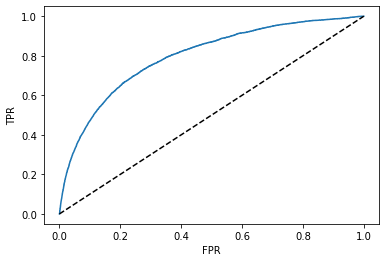

In [135]:
plt.plot(fpr,tpr,label='logit model (area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('FPR')
plt.ylabel('TPR')